In [41]:
import numpy as np
import matplotlib.pyplot as plt
# from M_Functions.signal_generator import *
from M_Functions.crc import *
from preambules_list import preambule_list, Preambule

stat_data = np.load('python_simulations.npz')
loaded_all_energies = stat_data['all_energies'] #[preambule, amplitude step, generations]
loaded_all_points = stat_data['all_points']
loaded_mean_energies = stat_data['mean_energies']
loaded_mean_points = stat_data['mean_points']
loaded_lower_quantile_points = stat_data['lower_quantile_points']
loaded_higher_quantile_points = stat_data['higher_quantile_points']

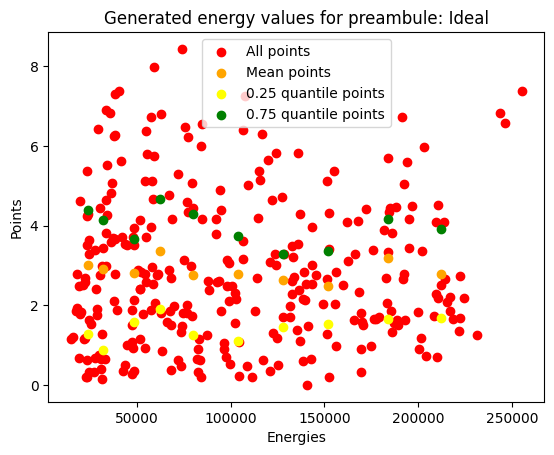

In [42]:
preambule_to_show = Preambule.Ideal.value

plt.scatter(loaded_all_energies[preambule_to_show, :, :], loaded_all_points[preambule_to_show, :, :], marker='o', color='red', label="All points")
plt.scatter(loaded_mean_energies[preambule_to_show, :], loaded_mean_points[preambule_to_show, :], marker='o', color='orange', label="Mean points")
plt.scatter(loaded_mean_energies[preambule_to_show, :], loaded_lower_quantile_points[preambule_to_show, :], marker='o', color='yellow', label="0.25 quantile points")
plt.scatter(loaded_mean_energies[preambule_to_show, :], loaded_higher_quantile_points[preambule_to_show, :], marker='o', color='green', label="0.75 quantile points")
plt.xlabel('Energies')
plt.ylabel('Points')
plt.title("Generated energy values for preambule: " + preambule_list[preambule_to_show].get_name())
plt.legend()
plt.show()

Preambule Ideal correlation coef: 0.07432263551230645
Preambule Negative correlation coef: 0.009309867657157444
Preambule Negative normalized correlation coef: 0.03549233531639003
Preambule Extended correlation coef: 0.12417037451946318
Preambule Extended negative correlation coef: -0.10945581396860529
Preambule Extended normalized correlation coef: 0.048611005706157534


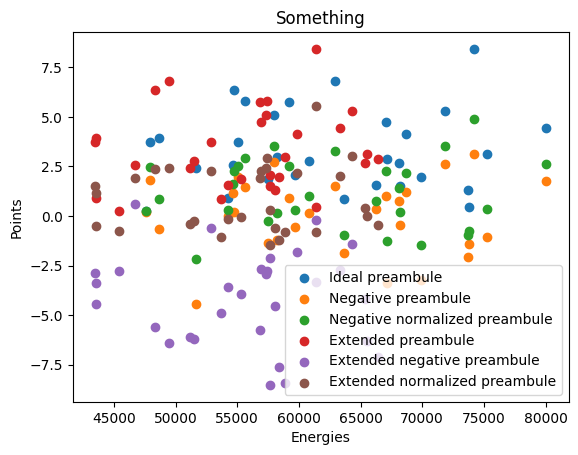

In [43]:
amplitude_i = 3
for preambule_i in range(list(Preambule)[0].value, list(Preambule)[-1].value):
    corr_coef = np.corrcoef(loaded_all_energies[preambule_i, amplitude_i, :], loaded_all_points[preambule_i, amplitude_i, :])
    print("Preambule " + preambule_list[preambule_i].get_name() + " correlation coef: " + str(corr_coef[1][0]))
    plt.scatter(loaded_all_energies[preambule_i, amplitude_i, :], loaded_all_points[preambule_i, amplitude_i, :], label=preambule_list[preambule_i].get_name() + " preambule")
plt.xlabel('Energies')
plt.ylabel('Points')
plt.title("Something")
plt.legend()
plt.show()

In [ ]:
# Polynomial fitting
# for convIndex = 1:uint32(ConvolutionEnum.last)
#     for approxIndex = 1:uint32(ApproximationEnum.last)
#         p_fit_x = 0:max(meanEnergies(4, :)/10):max(meanEnergies(4, :));
#         p_fit = polyval(allApproximations((convIndex-1) * uint32(ApproximationEnum.last) + approxIndex).coeficients, p_fit_x);
#         figure
#         plot(p_fit_x, p_fit, 'DisplayName', "Fitted data")
#         hold on
#         plot(meanEnergies(convIndex, :), meanPoints(convIndex, :), 'DisplayName', "Original data")
#         hold off
#         title(sprintf("Approximation of %s with %s", convTypes(convIndex).name), allApproximations((convIndex-1) * uint32(ApproximationEnum.last) + approxIndex).name)
#         legend
#     end
# end
for preambule_i in range(list(Preambule)[0].value, list(Preambule)[-1].value):

